Этот ноутбук явлется решением следующего [хакатона](https://github.com/dru4elos/Khakaton-DSMED-project/tree/main)

# **«Проектное исследование на основе открытых данных в области биомедицины»**

**Цель:**

Применение как классических методов машинного обучения, так и глубокого обучения для достижения наилучших результатов в предсказании наличия или отсутствия одного из 42 заболеваний на основе анализа 132 симптомов. Набор данных состоит двух датасетов: набор для обучения training.csv и набор для тестирования модели testing.csv


Для решения поставленой цели будет использоваться библиотека глубокого обучения:

**tensorflow**

# 1.   Установим и импортируем нужные библиотеки



In [1]:
!pip install tensorflow pandas scikit-learn

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score


# 2. Загрузим данные для обучения и теста

In [11]:
# Загружаем данные
df = pd.read_csv('Training.csv')
df_test = pd.read_csv('Testing.csv')


In [4]:
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


# 3. Проведём разведочный анализ

In [12]:
# Выделим числовые и категориальные признаки
numeric_col = df.select_dtypes(exclude='object').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print(f'Числовые колонки {numeric_col}')
print(f'Категориальные колонки {categorical_columns}')

Числовые колонки ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',

Все колонки признаков - числовые, целевая колонка - категориальная.

Проверим качество данных в колонках признаков.

In [13]:
results = pd.DataFrame(index=numeric_col)
results['Доля пропусков'] = df[numeric_col].isnull().mean()
results['Максимальное значение'] = df[numeric_col].max()
results['Минимальное значение'] = df[numeric_col].min()
results['Среднее значение'] = df[numeric_col].mean()
results['Медиана'] = df[numeric_col].median()
results['Дисперсия'] = df[numeric_col].var()

results

,Доля пропусков,Максимальное значение,Минимальное значение,Среднее значение,Медиана,Дисперсия
itching,0.0,1.0,0.0,0.137805,0.0,0.118839
skin_rash,0.0,1.0,0.0,0.159756,0.0,0.134261
nodal_skin_eruptions,0.0,1.0,0.0,0.021951,0.0,0.021474
continuous_sneezing,0.0,1.0,0.0,0.045122,0.0,0.043095
shivering,0.0,1.0,0.0,0.021951,0.0,0.021474
...,...,...,...,...,...,...
inflammatory_nails,0.0,1.0,0.0,0.023171,0.0,0.022638
blister,0.0,1.0,0.0,0.023171,0.0,0.022638
red_sore_around_nose,0.0,1.0,0.0,0.023171,0.0,0.022638
yellow_crust_ooze,0.0,1.0,0.0,0.023171,0.0,0.022638


Все колонки признаков являются бинарными данными. В колонке **fluid_overload** все значения равны нулю, удаляем эту колонку.

In [14]:
df = df.drop(columns=['fluid_overload', 'Unnamed: 133'])

Посмотрим, насколько неравномерно распределены прогнозируемые значения в целевом массиве:

In [8]:
# Count rows in each category
category_counts = df.groupby('prognosis').size()
print(category_counts)

prognosis
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hep

Очевидно, что выборка была специально нормализована по статистикам рапределения классифицируемого заболевания, что позволяет нам выбирать множество для обучения и валидации случайным способом без стратификации.

# 4. Оценим значимость предикторов для прогноза цели.

Для анализа значимости предикторов для будем использовать алгоритм *Минимум избыточности максимум релевантности* **Minimum Redundancy Maximum Relevance** [mRMR](https://en.wikipedia.org/wiki/Minimum_redundancy_feature_selection)

In [15]:
# Function to calculate mutual information for redundancy
def calculate_redundancy(X, selected_feature):
    redundancy = 0
    for feature in X.columns:
        if feature != selected_feature:
            redundancy += mutual_info_score(X[selected_feature], X[feature])
    return redundancy / (X.shape[1] - 1)  # Average redundancy

# Function to perform mRMR feature selection
def mrmr(X, y, num_features):
    selected_features = []
    scores = {}

    # Calculate initial relevance for all features
    relevance_scores = mutual_info_classif(X, y)
    relevance_dict = dict(zip(X.columns, relevance_scores))

    # Select the first feature with highest relevance
    first_feature = max(relevance_dict, key=relevance_dict.get)
    selected_features.append(first_feature)
    scores[first_feature] = relevance_dict[first_feature]

    # Iteratively select features based on mRMR criterion
    for _ in range(1, num_features):
        best_feature = None
        best_score = -np.inf

        for feature in X.columns:
            if feature not in selected_features:
                # Calculate redundancy with already selected features
                redundancy = calculate_redundancy(X, feature)
                score = relevance_dict[feature] - redundancy  # mRMR score

                if score > best_score:
                    best_score = score
                    best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            scores[best_feature] = best_score

    return selected_features, scores

# Example usage with a sample dataset
if __name__ == "__main__":
    X = df.drop('prognosis', axis=1)
    y = df['prognosis']

    # Perform mRMR to select top 30 features
    num_features_to_select = 30
    selected_features, feature_scores = mrmr(X, y, num_features_to_select)

    print("Selected Features:", selected_features)
    print("Feature Scores:", feature_scores)

Selected Features: ['fatigue', 'high_fever', 'vomiting', 'loss_of_appetite', 'nausea', 'headache', 'abdominal_pain', 'yellowish_skin', 'yellowing_of_eyes', 'chills', 'skin_rash', 'sweating', 'joint_pain', 'chest_pain', 'malaise', 'itching', 'dark_urine', 'cough', 'diarrhoea', 'muscle_pain', 'lethargy', 'weight_loss', 'irritability', 'breathlessness', 'excessive_hunger', 'phlegm', 'loss_of_balance', 'mild_fever', 'blurred_and_distorted_vision', 'swelled_lymph_nodes']
Feature Scores: {'fatigue': 0.5716832263527811, 'high_fever': 0.5446569427160542, 'vomiting': 0.5355928675839926, 'loss_of_appetite': 0.5210969833379678, 'nausea': 0.493446890581893, 'headache': 0.48141754301995077, 'abdominal_pain': 0.4646845717247164, 'yellowish_skin': 0.41497983128686644, 'yellowing_of_eyes': 0.410272676091651, 'chills': 0.3997680106243686, 'skin_rash': 0.39739269853403114, 'sweating': 0.38214649367299885, 'joint_pain': 0.3739013329580648, 'chest_pain': 0.3728950807710105, 'malaise': 0.36616562865947344,

Выведем график для топ-60 наиболее значимых предикткоров по их оценкам значимости:

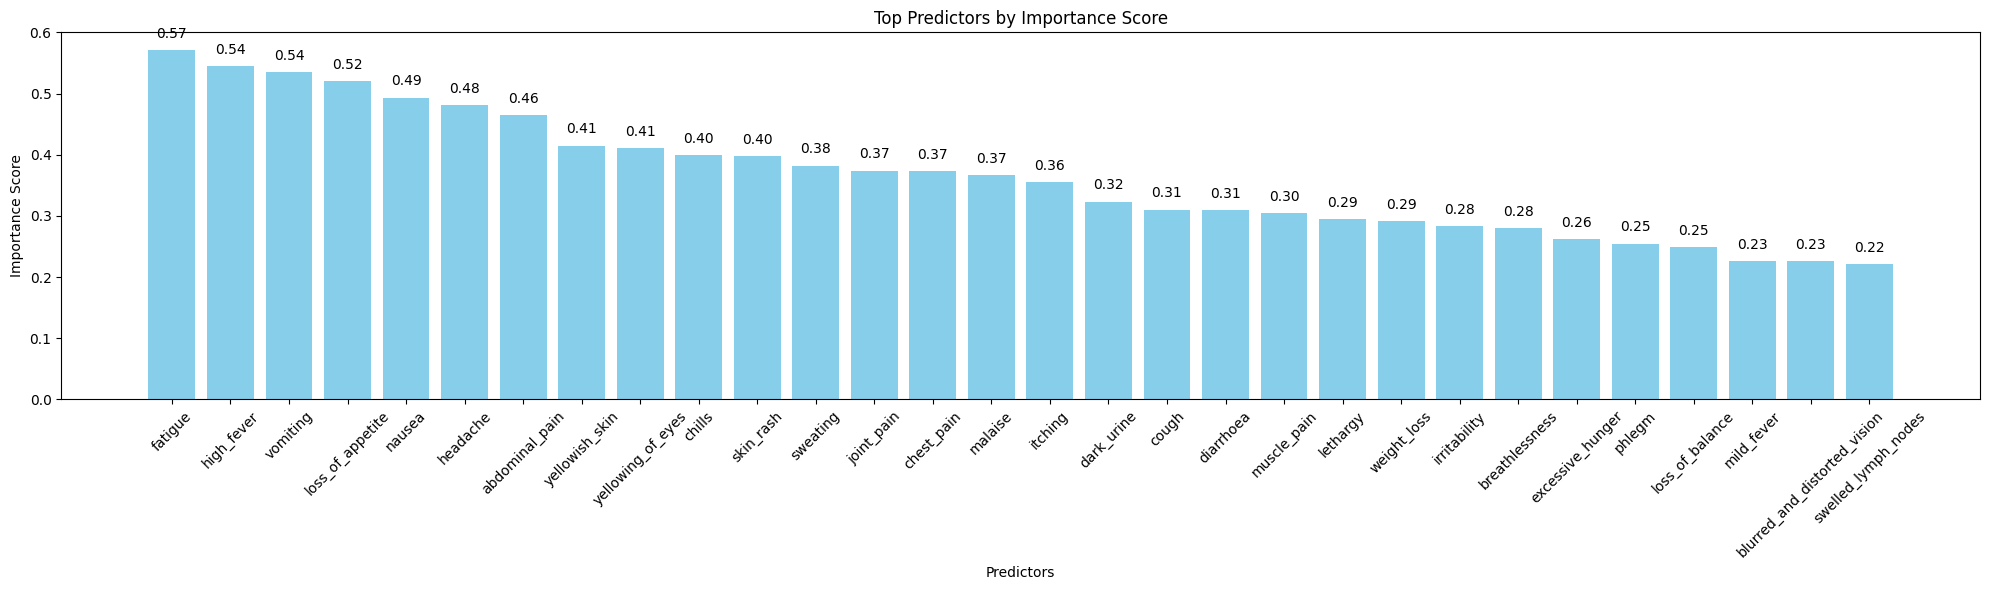

In [16]:
# Plotting the top predictors and their scores
plt.figure(figsize=(20, 6))

# Prepare data for plotting
top_predictors = list(feature_scores.keys())
top_scores = list(feature_scores.values())

# Create bar plot
plt.bar(top_predictors, top_scores, color='skyblue')

# Adding labels and title
plt.xlabel('Predictors')
plt.ylabel('Importance Score')
plt.title('Top Predictors by Importance Score')

# Adding value labels on top of bars
for index, value in enumerate(top_scores):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()

# Show plot
plt.show()

График показыавет монотонное убывание значимости предикторов для прогнозирования целевых заболеваний. Это даёт нам основание не понижать размерность тензора предикторов и использовать все предикторы.

# 5. Разбиение данных для обучения и валидации.

Категориальные данные в колонке цели трансформируем в числовые.

In [17]:
# Отделим предикторы (симптомы) от целей (заболеваний)
X = df.drop(columns=['prognosis']).values
y = df['prognosis'].values

X_test = df_test.drop(columns=['fluid_overload','prognosis']).values
y_test = df_test['prognosis'].values

# Закодируем цели в виде числовых значений, трансформируя из  категориальных
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_test_encoded = label_encoder.fit_transform(y_test)

# Разобъем выборку на обучающую и выборку валидации
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
# Стандартизируем предикторы
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 6. Модель Visual Transformer для построения прогноза.

Для классификации будем использовать модель трансформера Visual Transformer (ViT) https://habr.com/ru/articles/599677/

Из базовой архитектуры удалим часть отвечающую за подготовку изображений к токенизации, и будем использовать входной датафрейм с симптомами как данные токенов исходных изображений используемые в базовой архитектуре ViT.

In [19]:
# Функция создающая блок енкодера из архитектуры GPT трансформера
def build_transformer_model(input_shape, num_layers=2):
    # Создам входной тензор и понизим размерность тензора
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Reshape((1, input_shape[0]))(inputs)  # Размерность: (batch_size, 1, num_features)

    # Входной полносвязный слой и нормализация выхода
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

    # для каждого слоя трансформера
    for _ in range(num_layers):
        # Создаём слой потоков само-внимания на 8 голов и 64 ключа
        attention_output = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
        x = tf.keras.layers.Add()([x, attention_output])  # Сложим с входом
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x) # Нормализуем

        # Полносвязный слой на 32 нейрона и обнуление 40% нейронов для снижения переобучения
        ff_net = tf.keras.layers.Dense(32, activation='relu')(x)
        ff_net = tf.keras.layers.Dropout(0.4)(ff_net)
        ff_net = tf.keras.layers.Dense(64, activation='relu')(ff_net)  # возвращаем в размерность тензора x

        # Ещё раз складываем с входом и нормализуем
        x = tf.keras.layers.Add()([x, ff_net])
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

    # Усредняем и понижаем x до размерности 2D: (batch_size, features)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Выходной полносвязный строй классифицирующий на 42 класса
    outputs = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (X_train.shape[1],)
model = build_transformer_model(input_shape)

In [20]:
# Скомпилируем трансформер, указав метрики для обучения
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# тернируем модель
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 1.0295

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.8169 - loss: 0.9638 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - va

Обучение показыает, что модель успешно определяет все 100% заболеваний на обучающей выборке.

In [22]:
# проверим значения на выборке валидации
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.8669e-04
Validation Loss: 0.0006784505094401538, Validation Accuracy: 1.0


На выборке валидации также имеем 100% точности классификации.

In [23]:
# проверим значения на выборке тестирования
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Validation Loss: {test_loss}, Validation Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9841 - loss: 0.0929
Validation Loss: 0.1390945166349411, Validation Accuracy: 0.976190447807312


В тестовых данных, которые модель не видел при обучении, точность снижается до 98%

# Выводы

Для прогнозирования 42 заболеваний по 131 бинарному признаку использовалась архитектура нейросети из класса **Visual Transformer**.

Из базовой архитектуры ViT были исключёны блоки отвечающие за разбиение изображений на патчи и енкодирования эмбедингов положения патчей в изображении.

Из гиперпараметров были заданы следующие значения:


*   Количество слоёв: 2
*   Количество голов само-внимания: 8
*   Количество ключей внимания для голов: 64
*   Количество обнуляемых нейронов для устранения переобучения: 40%


В результате, такая модель модифицированного **Visual Transformer**, изначально предназначенного для классификации изображений, позволяет с высокой точностью (Accuracy: 98%) прогнозировать 42 разных заболевания по 131 признаку.
